#Import Necessary Libraries

In [ ]:
!pip -q install yellowbrick==1.3
!pip -q install kneed
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install plotly
!pip install squarify
!pip install chart_studio
!pip -q install factor_analyzer
! pip install distance
!pip install sentence-transformers

     |████████████████████████████████| 271 kB 5.3 MB/s 
     |████████████████████████████████| 50 kB 2.9 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149862 sha256=1c68c897e5d7f444059e93fdddadc80c9db5976b35df1af7ed1ac0ceeca3b79e
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein
     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 41 kB 290 kB/s 
     |████████████████████████████████| 180 kB 5.3 MB/s 
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=01e5269695108a98ae79b08ea7a8747c4681599a38af3d07a6e59e880c1dab39
  Stored in directory: /root/.cache/pip/wheels/b2/10/1b/96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built distance
     |████████████████████████████████| 78 kB 3.2 MB/s 
     |████████████████████████████████| 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly
import plotly.express as px
import plotly.io as pio
import datetime
import squarify

import warnings
warnings.filterwarnings('ignore')

# Pre-processing data
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import functools
from functools import lru_cache
from bs4 import BeautifulSoup
import re

# Word embedding model Word2Vec
import gensim
import gensim.downloader as gensim_api
from gensim.models.word2vec import Word2Vec
from sklearn.decomposition import PCA

# Bag of words TD-IDF
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

# Advanced feature extraction
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# import data
from google.colab import files
import openpyxl

pio.renderers.default = 'colab' 
import distance

from sentence_transformers import SentenceTransformer, util
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [ ]:
# download files
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nlp = gensim_api.load("word2vec-google-news-300")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[==================================================] 100.0% 1662.8/1662.8MB downloaded


#Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cross Validation

In [ ]:
models = [('LogReg', logr)]
results = []
names = []
dfs = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

for name, model in models:
  kFold = KFold(n_splits=10, shuffle=True, random_state=1)
  cv_results = cross_validate(model, X_train, y_train, cv=kFold, scoring=scoring)
  clf = model.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(name)
  print(classification_report(y_test, y_pred, target_names=['is_not_duplicate', 'is_duplicate']))
  
  results.append(cv_results)
  names.append(name)
  this_df = pd.DataFrame(cv_results)
  this_df['model'] = name
  dfs.append(this_df)

final = pd.concat(dfs, ignore_index=True)







---




In [ ]:
model_samples = []
for model in list(set(final.model.values)):
  model_df = final.loc[final.model == model]
  sample = model_df.sample(n=30, replace=True)
  model_samples.append(sample)

samples_df = pd.concat(model_samples, ignore_index=True)
results_long = pd.melt(samples_df, id_vars=['model'], var_name='metrics', value_name='values')

time_metrics = ['fit_time','score_time']

results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by='values')

results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by='values')

In [ ]:
# performance visualization
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
metrics = list(set(results_long_nofit.metrics.values))
samples_df.groupby(['model'])[metrics].agg([np.std, np.mean])

In [ ]:
time_metrics = list(set(results_long_fit.metrics.values))
samples_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

SVM

In [ ]:
#read in the csv file with cosine similarity added
path = "/content/drive/MyDrive/CS3244/cleaned_features.csv"
train_clean = pd.read_csv(path)
train_clean.head()

,is_duplicate,qid1,qid2,question1_cleaned,question2_cleaned,cosine_similarity,q1_word_count,q2_word_count,q1char_count,q2char_count,freq_qid1,freq_qid2,common_words_count,total_unique_num_words,tot_words,words_ratio,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0.891528,14,12,65,56,1,1,11,12,23,0.478261,93,100,93,100
1,0,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0.667396,10,15,48,85,4,1,7,17,24,0.291667,65,73,63,86
2,0,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0.499441,14,10,72,58,1,1,4,20,24,0.166667,54,53,66,66
3,0,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,0.165055,11,13,48,59,1,1,0,20,20,0.000000,36,40,36,36
4,0,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0.211917,13,7,73,38,3,1,4,16,20,0.200000,45,55,47,67


In [ ]:
#scaling of data and splitting into train and test
X_train_clean = train_clean.drop(['is_duplicate', 'qid1', 'qid2','question1_cleaned','question2_cleaned'], axis = 1)
y_train_clean = train_clean['is_duplicate']
#scale the data
#scaler = StandardScaler()
#scaled = scaler.fit_transform(X_train_clean)
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size = 0.2, stratify = y_train_clean)

NameError: ignored

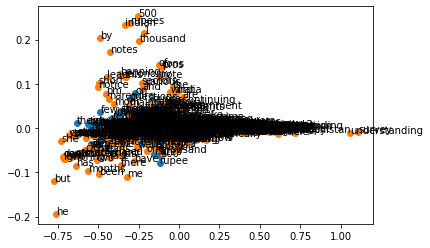

In [ ]:
q1_w2v_train = q1_w2v_train[:1500]
q2_w2v_train = q2_w2v_train[:1500]
train_labels_truncated = train_labels[:1500]
train_labels_truncated = train_labels
#word vectors storing them into a dataframe
model_train=np.hstack((q1_w2v_train.values, q2_w2v_train.values))
model_test=np.hstack((q1_w2v_test.values, q2_w2v_test.values))

#using word2vec
q1_w2v_test = w2v(X_test['question1_cleaned'][0:100])
q2_w2v_test = w2v(X_test['question2_cleaned'][0:100])
#q1_tfidf_test = vectorise_tfIdf(X_test['question1_cleaned'][0:100])
#q2_tfidf_test = vectorise_tfIdf(X_test['question2_cleaned'][0:100])

In [ ]:
#fit word2vec embeddings on to model
w2


In [ ]:
#using version 1

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss, confusion_matrix
#Hyperparameter tuning
X_train_clean = train_clean.drop(['is_duplicate', 'qid1', 'qid2','question1_cleaned','question2_cleaned'], axis = 1)
y_train_clean = train_clean['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size = 0.2, stratify = y_train_clean)


#create list to store in log-loss
l1_logloss = []
l2_logloss = []

#we need to find an optimum value of alpha
alpha = [10**x for x in range(-5, 2)]


for a in alpha:
  # Initialize SGDClassifier
  sgd_clf = SGDClassifier(loss='hinge', alpha=a, penalty='l1', n_jobs=-1, random_state=42)
  
  # Fit/train model
  sgd_clf.fit(X_train, y_train)

  # Initialize calibration model
  cal_clf = CalibratedClassifierCV(sgd_clf)
  
  # Fit calibration model
  cal_clf.fit(X_train, y_train)

  # Predict on test data
  predict_prob = cal_clf.predict_proba(X_test)

  # Get log-loss on predictions
  loss = (log_loss(y_test, predict_prob))
  l1_logloss.append(loss)

  print('Regularization: {}\talpha = {}\tloss: {}'.format('L1', a, loss))


# L2 regularization
# Iterate over alphas
print('\nL2 Regularization')
for a in alpha:
  # Initialize SGDClassifier
  sgd_clf = SGDClassifier(loss='hinge', alpha=a, penalty='l2', n_jobs=-1, random_state=42)
  
  # Fit/train model
  sgd_clf.fit(X_train, y_train)

  # Initialize calibration model
  cal_clf = CalibratedClassifierCV(sgd_clf)
  
  cal_clf.fit(X_train, y_train)

  # Predict on test data
  pred_prob = cal_clf.predict_proba(X_test)

  # Get log-loss on predictions
  loss = (log_loss(y_test, pred_prob))
  l2_logloss.append(loss)

  print('Regularization: {}\talpha = {}\tloss: {}'.format('L2', a, loss))

  

Regularization: L1	alpha = 1e-05	loss: 0.3173811834720594
Regularization: L1	alpha = 0.0001	loss: 0.31718062231494004
Regularization: L1	alpha = 0.001	loss: 0.32157634720530653
Regularization: L1	alpha = 0.01	loss: 0.37382335226091323
Regularization: L1	alpha = 0.1	loss: 0.4648478145998546
Regularization: L1	alpha = 1	loss: 0.4676789973629448
Regularization: L1	alpha = 10	loss: 0.6931471805869995

L2 Regularization
Regularization: L2	alpha = 1e-05	loss: 0.33018082194933135
Regularization: L2	alpha = 0.0001	loss: 0.3318664549405791
Regularization: L2	alpha = 0.001	loss: 0.36309368472768705
Regularization: L2	alpha = 0.01	loss: 0.39804109082403405
Regularization: L2	alpha = 0.1	loss: 0.44498698881094384
Regularization: L2	alpha = 1	loss: 0.4548238234130877
Regularization: L2	alpha = 10	loss: 0.47091779410282103


Word embedding resources
* [Word embedding Wor
* [Word embedding algos](https://machinelearningmastery.com/what-are-word-embeddings/)
* [Word2Vec with gensim](https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794)

In [ ]:
#  Tf-Idf (advanced variant of bag-of-words)
def vectorise_tfIdf(corpus):
  vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

  # extract vocabulary
  vectorizer.fit(corpus)
  X_train = vectorizer.transform(corpus) # tfidf_matix X_train has (question, position of word in vocab) - TF-IDF values -> form vector

  # map feature name to TF-IDF values
  map = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

  # create feature matrix
  # sns.heatmap(X_train.todense()[:,np.random.randint(0,corpus.shape[0],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

  # convert to dataframe
  # X_train = pd.DataFrame.sparse.from_spmatrix(X_train)
  # print(X_train)
  return X_train

vectorise_tfIdf(train_clean[0:100]['question1_cleaned'])

<100x1355 sparse matrix of type '<class 'numpy.float64'>'
	with 1967 stored elements in Compressed Sparse Row format>

How to train the model on word vectors (glove, tf-idf, w2v) and sentence (sentence encoder) vectors & train the model:

Some words or sentence give no vector -> research how to handle this esp if entire sentence no vector:

To do: Consider bigrams, trigrams



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.036931,-0.02707,-0.151067,-0.083153,-0.056137,-0.001481,-0.127934,0.167236,-0.104213,0.16081,0.083846,0.00948,0.012142,0.01304,0.126082,-0.036188,0.021121,-0.092827,-0.191421,-0.18081,-0.142172,0.066474,0.033378,0.119894,-0.028684,0.026127,0.03513,-0.17049,-0.031333,0.063118,-0.062313,0.01193,-0.115664,-0.069929,-0.078515,-0.057908,0.165232,-0.094935,-0.094185,0.044034,...,0.016943,0.127228,0.043017,-0.008237,0.010143,-0.057936,0.048323,-0.114564,-0.041713,0.089766,-0.042727,0.007635,0.128627,-0.071084,-0.023705,0.129945,0.039096,-0.002118,0.020307,0.167891,-0.091931,-0.0555,0.084465,-0.027335,-0.01269,0.066631,0.022378,0.19398,0.031318,0.040407,0.023793,-0.073821,0.037065,0.027596,-0.046335,0.009425,0.04076,-0.050076,0.00695,0.023952
1,-0.036931,-0.02707,-0.151067,-0.083153,-0.056137,-0.001481,-0.127934,0.167236,-0.104213,0.16081,0.083846,0.00948,0.012142,0.01304,0.126082,-0.036188,0.021121,-0.092827,-0.191421,-0.18081,-0.142172,0.066474,0.033378,0.119894,-0.028684,0.026127,0.03513,-0.17049,-0.031333,0.063118,-0.062313,0.01193,-0.115664,-0.069929,-0.078515,-0.057908,0.165232,-0.094935,-0.094185,0.044034,...,0.016943,0.127228,0.043017,-0.008237,0.010143,-0.057936,0.048323,-0.114564,-0.041713,0.089766,-0.042727,0.007635,0.128627,-0.071084,-0.023705,0.129945,0.039096,-0.002118,0.020307,0.167891,-0.091931,-0.0555,0.084465,-0.027335,-0.01269,0.066631,0.022378,0.19398,0.031318,0.040407,0.023793,-0.073821,0.037065,0.027596,-0.046335,0.009425,0.04076,-0.050076,0.00695,0.023952
2,-0.036931,-0.02707,-0.151067,-0.083153,-0.056137,-0.001481,-0.127934,0.167236,-0.104213,0.16081,0.083846,0.00948,0.012142,0.01304,0.126082,-0.036188,0.021121,-0.092827,-0.191421,-0.18081,-0.142172,0.066474,0.033378,0.119894,-0.028684,0.026127,0.03513,-0.17049,-0.031333,0.063118,-0.062313,0.01193,-0.115664,-0.069929,-0.078515,-0.057908,0.165232,-0.094935,-0.094185,0.044034,...,0.016943,0.127228,0.043017,-0.008237,0.010143,-0.057936,0.048323,-0.114564,-0.041713,0.089766,-0.042727,0.007635,0.128627,-0.071084,-0.023705,0.129945,0.039096,-0.002118,0.020307,0.167891,-0.091931,-0.0555,0.084465,-0.027335,-0.01269,0.066631,0.022378,0.19398,0.031318,0.040407,0.023793,-0.073821,0.037065,0.027596,-0.046335,0.009425,0.04076,-0.050076,0.00695,0.023952
3,-0.036931,-0.02707,-0.151067,-0.083153,-0.056137,-0.001481,-0.127934,0.167236,-0.104213,0.16081,0.083846,0.00948,0.012142,0.01304,0.126082,-0.036188,0.021121,-0.092827,-0.191421,-0.18081,-0.142172,0.066474,0.033378,0.119894,-0.028684,0.026127,0.03513,-0.17049,-0.031333,0.063118,-0.062313,0.01193,-0.115664,-0.069929,-0.078515,-0.057908,0.165232,-0.094935,-0.094185,0.044034,...,0.016943,0.127228,0.043017,-0.008237,0.010143,-0.057936,0.048323,-0.114564,-0.041713,0.089766,-0.042727,0.007635,0.128627,-0.071084,-0.023705,0.129945,0.039096,-0.002118,0.020307,0.167891,-0.091931,-0.0555,0.084465,-0.027335,-0.01269,0.066631,0.022378,0.19398,0.031318,0.040407,0.023793,-0.073821,0.037065,0.027596,-0.046335,0.009425,0.04076,-0.050076,0.00695,0.023952
4,-0.036931,-0.02707,-0.151067,-0.083153,-0.056137,-0.001481,-0.127934,0.167236,-0.104213,0.16081,0.083846,0.00948,0.012142,0.01304,0.126082,-0.036188,0.021121,-0.092827,-0.191421,-0.18081,-0.142172,0.066474,0.033378,0.119894,-0.028684,0.026127,0.03513,-0.17049,-0.031333,0.063118,-0.062313,0.01193,-0.115664,-0.069929,-0.078515,-0.057908,0.165232,-0.094935,-0.094185,0.044034,...,0.016943,0.127228,0.043017,-0.008237,0.010143,-0.057936,0.048323,-0.114564,-0.041713,0.089766,-0.042727,0.007635,0.128627,-0.071084,-0.023705,0.129945,0.039096,-0.002118,0.020307,0.167891,-0.091931,-0.0555,0.084465,-0.027335,-0.01269,0.066631,0.022378,0.19398,0.031318,0.040407,0.023793,-0.073821,0.037065,0.027596,-0.046335,0.009425,0.04076,-0

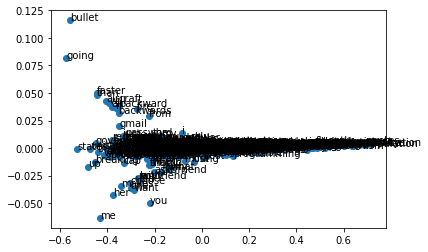

In [ ]:
# need to vectorize the plaintext q before doing kFold
# fit using Word Embedding model Word2Vec

# 1. get mean vector
# 2. 

def w2v(train_data):
  # Initialize list to store question vectors
  train_vectors = []

  # split each sentence to a list of strings
  train_data = list(map(lambda t: t[1].split(), train_data.iteritems()))
  nlp = Word2Vec(train_data, size=300, window=15, min_count=1, sg=1, iter=30)
  # print(nlp)
  nlp.save('model')
  nlp = Word2Vec.load('model')
  words = list(nlp.wv.vocab)

  # visualise data
  X = nlp[nlp.wv.vocab]
  pca = PCA(n_components=2)
  result = pca.fit_transform(X)
  plt.scatter(result[:, 0], result[:, 1])
  for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
  # plt.show()

  # store word vector (300,) for each word
  vectors = dict({})
  for idx, key in enumerate(nlp.wv.vocab):
    vectors[key] = nlp.wv[key]
  # uncomment below to visualise the first word vector
  # print("shape: " + str(vectors['one'].shape) + ", word: " + str(words[0]) + ", word vector: " + str(vectors['one']))

  # store the mean vector (300,)
  mean_vector = np.zeros((len(vectors[words[0]])))
  # calculate mean vector
  for question in train_data:
    for word in question:
      mean_vector += vectors[word]
    mean_vector /= len(question)
    train_vectors.append(mean_vector)

  # format data into DataFrame: each row is 1 word, each col is 1 dimension
  q1_w2v_train = pd.DataFrame(train_vectors)
  # print(q1_w2v_train)
  return q1_w2v_train

w2v(train_clean[0:100]['question1_cleaned'])

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# drop label col
data = train_data.drop(['is_duplicate'], axis=1)
print(data)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# **SVM**

Hyperparameter tuning for SVM-  choosing the right alpha 
too small alpha may lead to overfiitng
too large alpha may lead to overfitting

In [ ]:
#read our necessary csv files
# change path accordingly
path = "/content/drive/MyDrive/CS3244/fulltrain_cleaned.csv"
train_clean = pd.read_csv("/content/drive/MyDrive/CS3244/train_clean.csv")
train_stopwords_lemmatize = pd.read_csv("/content/drive/MyDrive/CS3244/train_stopwords_lemmatize.csv")
train_stopwords=pd.read_csv("/content/drive/MyDrive/CS3244/train_stopwords.csv")


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics._classification import accuracy_score, log_loss, confusion_matrix

In [ ]:
def plot_roc_auc(fpr,tpr):
 
 # Initialize plot
 f, ax = plt.subplots(figsize=(14,8))
 
 # Plot ROC
 roc_auc = metrics.auc(fpr, tpr)
 ax.plot(fpr, tpr, lw=2, alpha=0.3,
 label="AUC = %0.2f" % (roc_auc))
 # Plot the random line.
 plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r',
 label="Random", alpha=.8)
 
 # Fine tune and show the plot.
 ax.set_xlim([-0.05, 1.05])
 ax.set_ylim([-0.05, 1.05])
 ax.set_xlabel("False Positive Rate (FPR)")
 ax.set_ylabel("True Positive Rate (TPR)")
 ax.set_title("ROC-AUC")
 ax.legend(loc="lower right")
 plt.show()

fitting with basic features and ratios obtained from fuzzy wuzzy package that makes use of levenshtein distance

In [ ]:
train_clean = train_clean.sample(n= 20000, random_state = 3244)
X_train_clean = train_clean.drop(['is_duplicate', 'qid1', 'qid2', 'question1', 'question2', 'question1_cleaned', 'question2_cleaned'], axis = 1)
y_train_clean = train_clean['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size = 0.2, stratify = y_train_clean)

alpha = [10**x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#fitting with the best alpha found
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))


# evaluation metrics for l1 regularisation using clean features
print("Accuracy:",metrics.accuracy_score(y_test, predicted_y))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,predicted_y))
print("F1:",metrics.f1_score(y_test,predicted_y))
print("precision:",metrics.precision_score(y_test,predicted_y))
# Compute roc-auc
print("area under curve (auc): ", metrics.roc_auc_score(y_test,predicted_y))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_y)
# Print the evaluation metrics as pandas dataframe
score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})



For values of alpha =  1e-05 The log loss is: 0.623237194019149
For values of alpha =  0.0001 The log loss is: 0.623237194019149
For values of alpha =  0.001 The log loss is: 0.623237194019149
For values of alpha =  0.01 The log loss is: 0.623237194019149
For values of alpha =  0.1 The log loss is: 0.623237194019149
For values of alpha =  1 The log loss is: 0.623237194019149
For values of alpha =  10 The log loss is: 0.623237194019149
For values of best alpha =  1e-05 The train log loss is: 0.6233340158682733
For values of best alpha =  1e-05 The test log loss is: 0.623237194019149
Total number of data points : 4000
Accuracy: 0.68475
Recall: 1.0
F1: 0.8128802492951476
precision: 0.68475
area under curve (auc):  0.5


For values of alpha =  1e-05 The log loss is: 0.6238175966117288
For values of alpha =  0.0001 The log loss is: 0.6238175966117288
For values of alpha =  0.001 The log loss is: 0.6238175966117288
For values of alpha =  0.01 The log loss is: 0.6238175966117288
For values of alpha =  0.1 The log loss is: 0.6238175966117288
For values of alpha =  1 The log loss is: 0.6238175966117288
For values of alpha =  10 The log loss is: 0.6238175966117288
For values of best alpha =  1e-05 The train log loss is: 0.6238658088072947
For values of best alpha =  1e-05 The test log loss is: 0.6238175966117288
Total number of data points : 4000
Accuracy: 0.684
Recall: 1.0
F1: 0.8123515439429928
precision: 0.684
   ROC-AUC
0      0.5


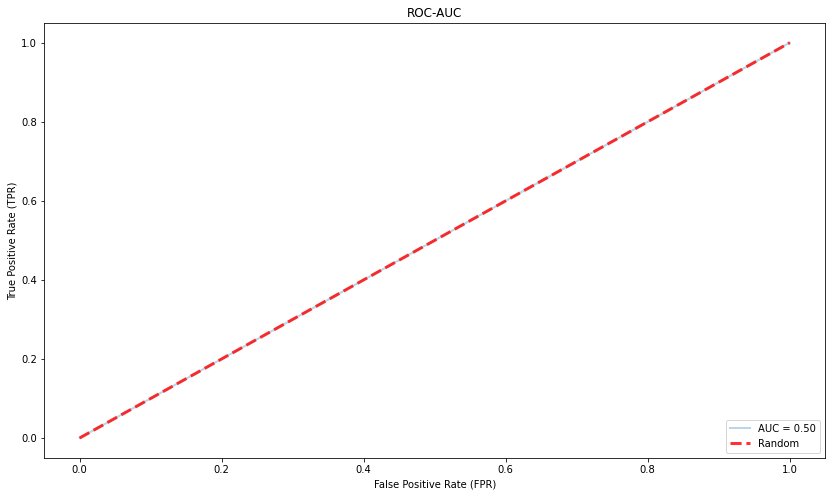

In [ ]:
#l1 regularization using train_stopwords_lemmatize
train_stopwords_lemmatize = train_stopwords_lemmatize.sample(n= 20000, random_state = 3244)
X_train_clean = train_stopwords_lemmatize.drop(['is_duplicate', 'qid1', 'qid2', 'question1', 'question2', 'question1_stopwords_lemmatize', 'question2_stopwords_lemmatize'], axis = 1)
y_train_clean = train_stopwords_lemmatize['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size = 0.2, stratify = y_train_clean)

alpha = [10**x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#fitting with the best alpha found
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
#plot_confusion_matrix(y_test, predicted_y)

# evaluation metrics for l1 regularisation using train_stopwords_lemmatize features
print("Accuracy:",metrics.accuracy_score(y_test, predicted_y))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,predicted_y))
print("F1:",metrics.f1_score(y_test,predicted_y))
print("precision:",metrics.precision_score(y_test,predicted_y))
#AUC-ROC
#prediction_test = predict_proba(X_test)[:,1]
# Compute roc-auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_y)
 
# Print the evaluation metrics as pandas dataframe
score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
print(score)
#plotting roc curve
plot_roc_auc(fpr,tpr)
plt.show()

For values of alpha =  1e-05 The log loss is: 0.6238175966117288
For values of alpha =  0.0001 The log loss is: 0.6238175966117288
For values of alpha =  0.001 The log loss is: 0.6238175966117288
For values of alpha =  0.01 The log loss is: 0.6238175966117288
For values of alpha =  0.1 The log loss is: 0.6238175966117288
For values of alpha =  1 The log loss is: 0.6238175966117288
For values of alpha =  10 The log loss is: 0.3622410788483795
For values of best alpha =  10 The train log loss is: 0.3694664451237206
For values of best alpha =  10 The test log loss is: 0.3622410788483795
Total number of data points : 4000
Accuracy: 0.81925
Recall: 0.8380847953216374
F1: 0.8638161612356375
precision: 0.8911776136805286
area under curve (auc):  0.8082829039899326


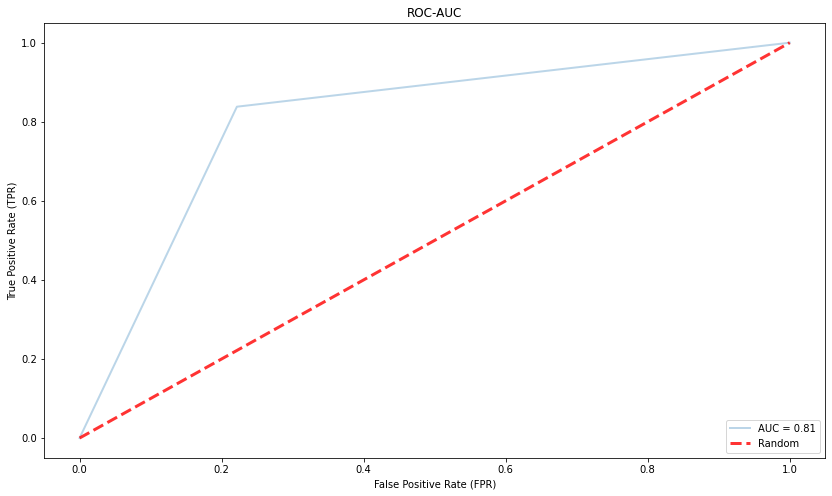

In [ ]:
#l1 regularization using train_stopwords
train_stopwords = train_stopwords.sample(n= 20000, random_state = 3244)
X_train_clean = train_stopwords.drop(['is_duplicate', 'qid1', 'qid2', 'question1', 'question2', 'question1_stopwords', 'question2_stopwords'], axis = 1)
y_train_clean = train_stopwords['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size = 0.2, stratify = y_train_clean)

alpha = [10**x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#fig, ax = plt.subplots()
#ax.plot(alpha, log_error_array,c='g')
#for i, txt in enumerate(np.round(log_error_array,3)):
    ##ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
#plt.grid()
#plt.title("Cross Validation Error for each alpha")
#plt.xlabel("Alpha i's")
#plt.ylabel("Error measure")
#plt.show()

#fitting with the best alpha found
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
#plot_confusion_matrix(y_test, predicted_y)

# evaluation metrics for l1 regularisation using train_stopwords features
print("Accuracy:",metrics.accuracy_score(y_test, predicted_y))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,predicted_y))
print("F1:",metrics.f1_score(y_test,predicted_y))
print("precision:",metrics.precision_score(y_test,predicted_y))
#AUC-ROC
#prediction_test = predict_proba(X_test)[:,1]
# Compute roc-auc
print("area under curve (auc): ", metrics.roc_auc_score(y_test,predicted_y))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_y)
# Print the evaluation metrics as pandas dataframe
score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})

plot_roc_auc(fpr,tpr)
plt.show()

For values of alpha =  1e-05 The log loss is: 0.623237194019149
For values of alpha =  0.0001 The log loss is: 0.623237194019149
For values of alpha =  0.001 The log loss is: 0.623237194019149
For values of alpha =  0.01 The log loss is: 0.623237194019149
For values of alpha =  0.1 The log loss is: 0.623237194019149
For values of alpha =  1 The log loss is: 0.5489438844726526
For values of alpha =  10 The log loss is: 0.4484905646837963
For values of best alpha =  10 The train log loss is: 0.4416807725331825
For values of best alpha =  10 The test log loss is: 0.4484905646837963
Total number of data points : 4000
Accuracy: 0.745
Recall: 0.8528660094925156
F1: 0.8208011243851018
precision: 0.7910599390450389


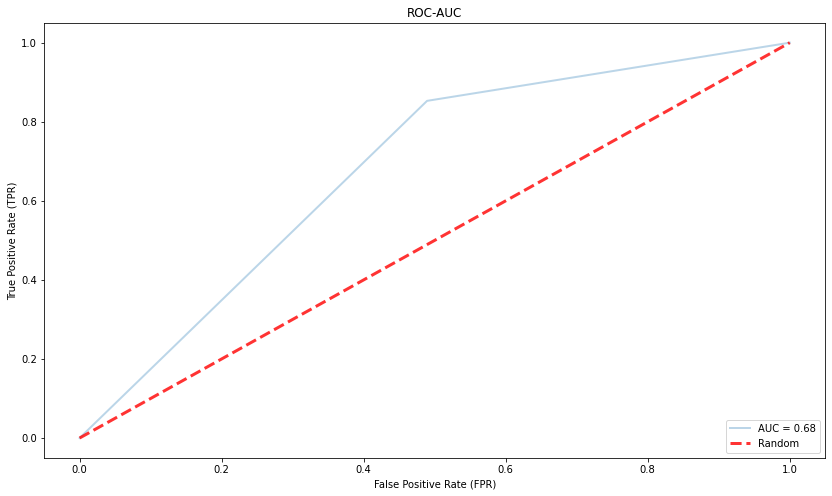

In [ ]:
#l2 regularization using clean

X_train_clean = train_clean.drop(['is_duplicate', 'qid1', 'qid2', 'question1', 'question2', 'question1_cleaned', 'question2_cleaned'], axis = 1)
y_train_clean = train_clean['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size = 0.2, stratify = y_train_clean)

alpha = [10**x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

# evaluation metrics for l2 regularisation using clean features
print("Accuracy:",metrics.accuracy_score(y_test, predicted_y))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,predicted_y))
print("F1:",metrics.f1_score(y_test,predicted_y))
print("precision:",metrics.precision_score(y_test,predicted_y))
#AUC-ROC
#prediction_test = predict_proba(X_test)[:,1]
# Compute roc-auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_y)
 
# Print the evaluation metrics as pandas dataframe
score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
plot_roc_auc(fpr,tpr)
plt.show()

For values of alpha =  1e-05 The log loss is: 0.6238175966117288
For values of alpha =  0.0001 The log loss is: 0.6238175966117288
For values of alpha =  0.001 The log loss is: 0.6238175966117288
For values of alpha =  0.01 The log loss is: 0.6238175966117288
For values of alpha =  0.1 The log loss is: 0.6238175966117288
For values of alpha =  1 The log loss is: 0.6238175966117288
For values of alpha =  10 The log loss is: 0.5585344496458003
For values of best alpha =  10 The train log loss is: 0.5586097409648164
For values of best alpha =  10 The test log loss is: 0.5585344496458003
Total number of data points : 4000
Accuracy: 0.684
Recall: 1.0
F1: 0.8123515439429928
precision: 0.684
area under curve (auc):  0.5


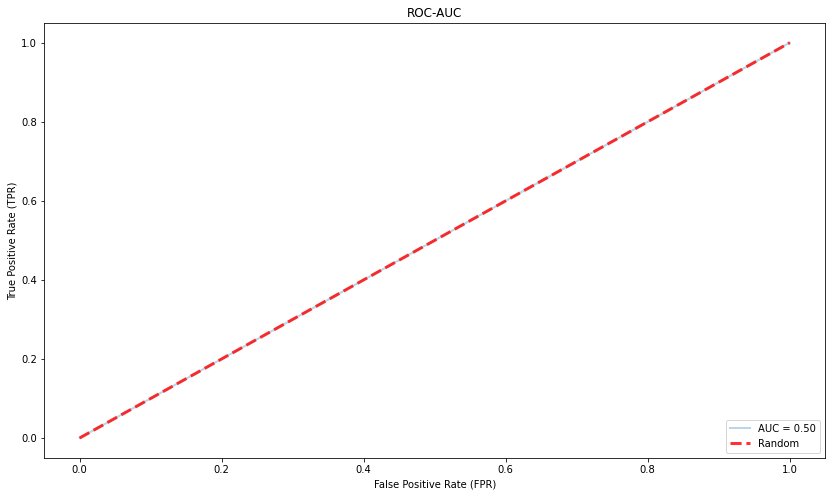

In [ ]:
#l2 regularization using train_stopwords_lemmatize

X_train_clean = train_stopwords_lemmatize.drop(['is_duplicate', 'qid1', 'qid2', 'question1_stopwords_lemmatize', 'question2_stopwords_lemmatize', 'question1', 'question2'], axis = 1)
y_train_clean = train_stopwords_lemmatize['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size = 0.2, stratify = y_train_clean)

alpha = [10**x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

# evaluation metrics for l2 regularisation using train_stopwords_lemmatize features
print("Accuracy:",metrics.accuracy_score(y_test, predicted_y))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,predicted_y))
print("F1:",metrics.f1_score(y_test,predicted_y))
print("precision:",metrics.precision_score(y_test,predicted_y))
#AUC-ROC
#prediction_test = predict_proba(X_test)[:,1]
# Compute roc-auc
print("area under curve (auc): ", metrics.roc_auc_score(y_test,predicted_y))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_y)
 
# Print the evaluation metrics as pandas dataframe
score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
plot_roc_auc(fpr,tpr)
plt.show()


For values of alpha =  1e-05 The log loss is: 0.6238175966117288
For values of alpha =  0.0001 The log loss is: 0.6238175966117288
For values of alpha =  0.001 The log loss is: 0.6238175966117288
For values of alpha =  0.01 The log loss is: 0.6238175966117288
For values of alpha =  0.1 The log loss is: 0.6238175966117288
For values of alpha =  1 The log loss is: 0.4994420975193326
For values of alpha =  10 The log loss is: 0.5092629055464657
For values of best alpha =  1 The train log loss is: 0.4985315158051695
For values of best alpha =  1 The test log loss is: 0.4994420975193326
Total number of data points : 4000
Accuracy: 0.68875
Recall: 0.9594298245614035
F1: 0.8083140877598152
precision: 0.6983240223463687


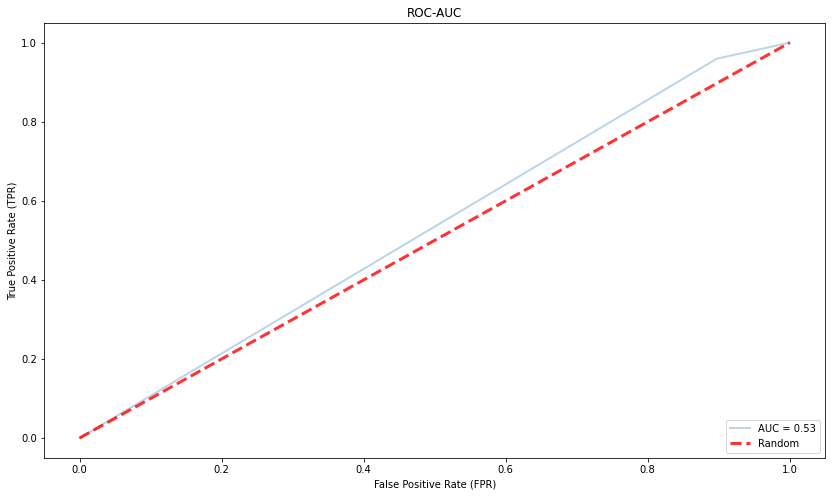

In [ ]:
#l2 regularization using train_stopwords
X_train_clean = train_stopwords.drop(['is_duplicate', 'qid1', 'qid2', 'question1', 'question2', 'question1_stopwords', 'question2_stopwords'], axis = 1)
y_train_clean = train_stopwords['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size = 0.2, stratify = y_train_clean)

alpha = [10**x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#fig, ax = plt.subplots()
#ax.plot(alpha, log_error_array,c='g')
#for i, txt in enumerate(np.round(log_error_array,3)):
    #ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
#plt.grid()
#plt.title("Cross Validation Error for each alpha")
#plt.xlabel("Alpha i's")
#plt.ylabel("Error measure")
#plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))



# evaluation metrics for l2 regularisation using train_stopwords_lemmatize features
print("Accuracy:",metrics.accuracy_score(y_test, predicted_y))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,predicted_y))
print("F1:",metrics.f1_score(y_test,predicted_y))
print("precision:",metrics.precision_score(y_test,predicted_y))
#AUC-ROC
#prediction_test = predict_proba(X_test)[:,1]
# Compute roc-auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_y)
 
# Print the evaluation metrics as pandas dataframe
score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
#plotting roc curve
plot_roc_auc(fpr,tpr)
plt.show()

SVM 
## -fitting with cosine similarity as an added feature


In [ ]:
path = "/content/drive/MyDrive/CS3244/cleaned_features.csv"
train_cosine = pd.read_csv(path)
train_cosine.head()

,is_duplicate,qid1,qid2,question1_cleaned,question2_cleaned,cosine_similarity,q1_word_count,q2_word_count,q1char_count,q2char_count,freq_qid1,freq_qid2,common_words_count,total_unique_num_words,tot_words,words_ratio,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0.891528,14,12,65,56,1,1,11,12,23,0.478261,93,100,93,100
1,0,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0.667396,10,15,48,85,4,1,7,17,24,0.291667,65,73,63,86
2,0,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0.499441,14,10,72,58,1,1,4,20,24,0.166667,54,53,66,66
3,0,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,0.165055,11,13,48,59,1,1,0,20,20,0.000000,36,40,36,36
4,0,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0.211917,13,7,73,38,3,1,4,16,20,0.200000,45,55,47,67


For values of alpha =  1e-05 The log loss is: 0.327980881585814
For values of alpha =  0.0001 The log loss is: 0.32857061711898733
For values of alpha =  0.001 The log loss is: 0.32158070198726035
For values of alpha =  0.01 The log loss is: 0.461251266713105
For values of alpha =  0.1 The log loss is: 0.4628190864893986
For values of alpha =  1 The log loss is: 0.4622891293095091
For values of alpha =  10 The log loss is: 0.6931426883651606
For values of best alpha =  0.001 The train log loss is: 0.32702869019647934
For values of best alpha =  0.001 The test log loss is: 0.32158070198726035
Total number of data points : 4000
Accuracy: 0.85475
Recall: 0.8605817452357071
F1: 0.8552205332668826
precision: 0.849925705794948
area under curve (auc):  0.8547674429069861


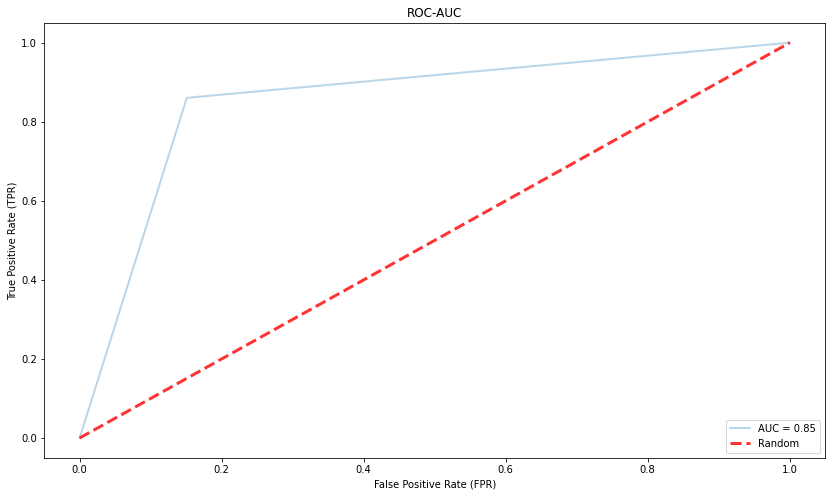

In [ ]:
#using l1 regularization
train_cosine = train_cosine.sample(n= 20000, random_state = 3244)
X_train_clean = train_cosine.drop(['is_duplicate', 'qid1', 'qid2',  'question1_cleaned', 'question2_cleaned'], axis = 1)
y_train_clean = train_cosine['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size = 0.2, stratify = y_train_clean)

alpha = [10**x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#fitting with the best alpha found
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
#plot_confusion_matrix(y_test, predicted_y)

# evaluation metrics for l1 regularisation using train_stopwords features
print("Accuracy:",metrics.accuracy_score(y_test, predicted_y))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,predicted_y))
print("F1:",metrics.f1_score(y_test,predicted_y))
print("precision:",metrics.precision_score(y_test,predicted_y))
#AUC-ROC
#prediction_test = predict_proba(X_test)[:,1]
# Compute roc-auc
print("area under curve (auc): ", metrics.roc_auc_score(y_test,predicted_y))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_y)
# Print the evaluation metrics as pandas dataframe
score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
#plotting roc curve
plot_roc_auc(fpr,tpr)
plt.show()

For values of alpha =  1e-05 The log loss is: 0.36243446977192845
For values of alpha =  0.0001 The log loss is: 0.3790666654023065
For values of alpha =  0.001 The log loss is: 0.37522630247305244
For values of alpha =  0.01 The log loss is: 0.3935136028303875
For values of alpha =  0.1 The log loss is: 0.42202630177605543
For values of alpha =  1 The log loss is: 0.43749917189742166
For values of alpha =  10 The log loss is: 0.4559241568301178
For values of best alpha =  1e-05 The train log loss is: 0.3690044796951599
For values of best alpha =  1e-05 The test log loss is: 0.36243446977192845
Total number of data points : 4000
Accuracy: 0.8315
Recall: 0.7923771313941825
F1: 0.8242044861763171
precision: 0.8586956521739131
area under curve (auc):  0.831382982446842


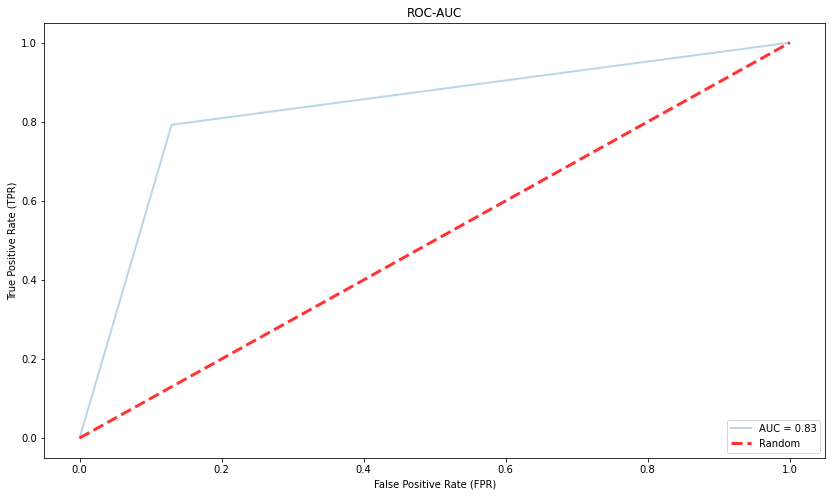

In [ ]:
#using l2 regularization with cosine similarity as an added feature
X_train_clean = train_cosine.drop(['is_duplicate', 'qid1', 'qid2',  'question1_cleaned', 'question2_cleaned'], axis = 1)
y_train_clean = train_cosine['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean,test_size = 0.2, stratify = y_train_clean)

alpha = [10**x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#fig, ax = plt.subplots()
#ax.plot(alpha, log_error_array,c='g')
#for i, txt in enumerate(np.round(log_error_array,3)):
    ##ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
#plt.grid()
#plt.title("Cross Validation Error for each alpha")
#plt.xlabel("Alpha i's")
#plt.ylabel("Error measure")
#plt.show()

#fitting with the best alpha found
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
#plot_confusion_matrix(y_test, predicted_y)

# evaluation metrics for l1 regularisation using train_stopwords features
print("Accuracy:",metrics.accuracy_score(y_test, predicted_y))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,predicted_y))
print("F1:",metrics.f1_score(y_test,predicted_y))
print("precision:",metrics.precision_score(y_test,predicted_y))
#AUC-ROC
#prediction_test = predict_proba(X_test)[:,1]
# Compute roc-auc
print("area under curve (auc): ", metrics.roc_auc_score(y_test,predicted_y))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_y)
# Print the evaluation metrics as pandas dataframe
score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
#plotting roc curve
plot_roc_auc(fpr,tpr)
plt.show()

## fitting word2vec embeddings onto our svm **model**

In [ ]:
# get from drive
train = pd.read_csv("/content/drive/MyDrive/CS3244/cleaned_vectors.csv")
# print_ratio(train)
# test if col is added
train.head()

,Unnamed: 0,qid1,qid2,q1_word_vector,q2_word_vector
0,0,1,2,[-2.43800984e-01 1.11542428e+00 2.22002299e-...,[ 1.14185096e-02 1.11012453e+00 -2.53954070e-...
1,1,3,4,[ 9.84083720e-01 1.24547977e+00 1.86770172e+...,[ 0.36065263 0.66631908 1.33693572 -0.011940...
2,2,5,6,[ 1.40538076e-01 1.11593014e+00 -5.43669169e-...,[-1.61694877e+00 1.72468183e+00 -8.65380272e-...
3,3,7,8,[-4.27551740e-01 1.52827830e+00 -1.38657130e+...,[-7.97978929e-02 2.59953398e+00 1.91817708e+...
4,4,9,10,[-8.78819039e-01 1.56384327e+00 -3.65561960e-...,[-7.90557795e-01 2.41724265e-01 2.65280945e-...


In [ ]:
# test is vector is length 300
def split(arrStr):
  arrStr = arrStr[1:len(arrStr)-1]
  arrStr = arrStr.split()
  return arrStr

def test(train_data):
  isSeries = isinstance(train_data, pd.Series)
  isArray = isinstance(train_data[0], np.ndarray)
  isArrayType = isinstance(train_data[0][0], np.float64)
  isDimension300 = len(train_data[0]) == 300 and len(train_data[train_data.size-1]) == 300
  isParsedCorrectly = isSeries and isArray and isArrayType and isDimension300
  print(isParsedCorrectly)

train['q1_word_vector'] = train['q1_word_vector'].apply(lambda x: np.asarray(split(x), dtype=np.float64))
train['q2_word_vector'] = train['q2_word_vector'].apply(lambda x: np.asarray(split(x), dtype=np.float64))
test(train['q1_word_vector'])
test(train['q1_word_vector'])

True
True


In [ ]:
#combine this with our other features 
w2v_train=pd.merge(train,train_cosine,how='inner',on=['qid1','qid2'])

In [ ]:
#using distance metric to get the distances between our vectors
#manhattan distance
def manhattan_dist(d1, d2):
  return [manhattan_distances([d1[i]], [d2[i]])[0] for i in range(d1.shape[0])]

#cosine similarity
def cos_similarity(d1, d2):
  return [cosine_similarity([d1[i]], [d2[i]])[0] for i in range(d1.shape[0])]
#word movers distance
def wmd(d1, d2):
  return [nlp.wmdistance([d1[i]], [d2[i]])[0] for i in range(d1.shape[0])]

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances
w2v_train['manhatt_dist']=manhattan_dist(w2v_train['q1_word_vector'], w2v_train['q2_word_vector'])

In [ ]:
w2v_train['cosine_sim_spacy']=cos_similarity(w2v_train['q1_word_vector'], w2v_train['q2_word_vector'])

As observed above, L2 regularization gives us better model performance due to its non-sparsity.

For values of alpha =  1e-05 The log loss is: 0.6460427700699594
For values of alpha =  0.0001 The log loss is: 0.6460427700699594
For values of alpha =  0.001 The log loss is: 0.6460427700699594
For values of alpha =  0.01 The log loss is: 0.6460427700699594
For values of alpha =  0.1 The log loss is: 0.6460427700699594
For values of alpha =  1 The log loss is: 0.5800419237876333
For values of alpha =  10 The log loss is: 0.46611495974951356
For values of best alpha =  10 The train log loss is: 0.4629320699292718
For values of best alpha =  10 The test log loss is: 0.46611495974951356
Total number of data points : 4000
Accuracy: 0.74775
Recall: 0.8348026063625911
F1: 0.8119291705498602
precision: 0.7902757619738752
area under curve (auc):  0.7096371047628915


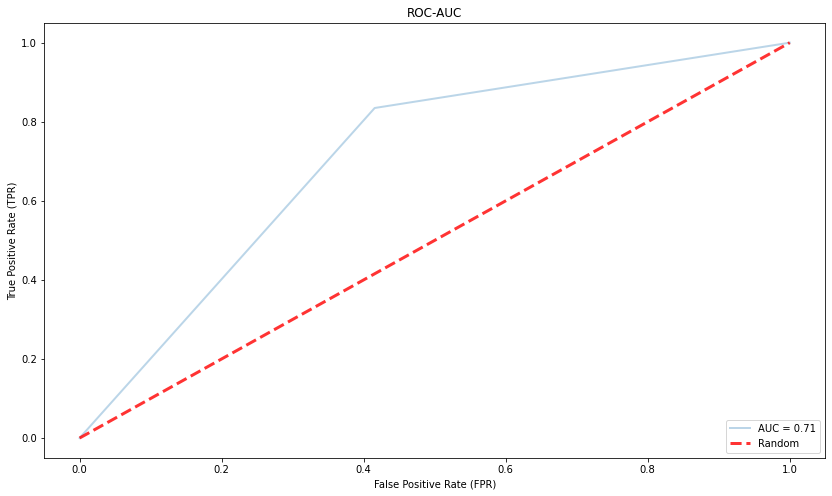

In [ ]:
#using l2 regularization for added distance features where we obtained manhattan distance and cosine similarity from spacy model.
w2v_train = w2v_train.sample(n= 20000, random_state = 3244)
X_train_clean = w2v_train.drop(['is_duplicate', 'qid1', 'qid2',  'question1_cleaned', 'question2_cleaned','q1_word_vector','q2_word_vector'], axis = 1)
y_train_clean = w2v_train['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size = 0.2, stratify = y_train_clean)

alpha = [10**x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#fig, ax = plt.subplots()
#ax.plot(alpha, log_error_array,c='g')
#for i, txt in enumerate(np.round(log_error_array,3)):
    ##ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
#plt.grid()
#plt.title("Cross Validation Error for each alpha")
#plt.xlabel("Alpha i's")
#plt.ylabel("Error measure")
#plt.show()

#fitting with the best alpha found
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
#plot_confusion_matrix(y_test, predicted_y)

# evaluation metrics for l1 regularisation using train_stopwords features
print("Accuracy:",metrics.accuracy_score(y_test, predicted_y))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,predicted_y))
print("F1:",metrics.f1_score(y_test,predicted_y))
print("precision:",metrics.precision_score(y_test,predicted_y))

#AUC-ROC
#prediction_test = predict_proba(X_test)[:,1]
# Compute roc-auc
print("area under curve (auc): ", metrics.roc_auc_score(y_test,predicted_y))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_y)
# Print the evaluation metrics as pandas dataframe
score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
#plotting roc curve
plot_roc_auc(fpr,tpr)
plt.show()

# **Principal** Component Analysis (PCA) for dimension reduction
(not much major findings)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from yellowbrick.features import PCA as YBPCA
from kneed import KneeLocator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import plotly.express as px

In [ ]:
#dimension reduction using PCA
new_df=train_cosine.drop(['is_duplicate', 'qid1', 'qid2',  'question1_cleaned', 'question2_cleaned'], axis = 1)
new_df

,cosine_similarity,q1_word_count,q2_word_count,q1char_count,q2char_count,freq_qid1,freq_qid2,common_words_count,total_unique_num_words,tot_words,words_ratio,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio
0,0.891528,14,12,65,56,1,1,11,12,23,0.478261,93,100,93,100
1,0.667396,10,15,48,85,4,1,7,17,24,0.291667,65,73,63,86
2,0.499441,14,10,72,58,1,1,4,20,24,0.166667,54,53,66,66
3,0.165055,11,13,48,59,1,1,0,20,20,0.000000,36,40,36,36
4,0.211917,13,7,73,38,3,1,4,16,20,0.200000,45,55,47,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509787,0.472403,15,5,70,19,6,1,2,18,20,0.100000,36,63,29,54
509788,0.941730,8,5,41,28,2,3,4,9,13,0.307692,78,96,78,78
509789,0.941730,8,5,41,28,2,3,4,9,13,0.307692,78,96,78,78
509790,0.785160,12,7,70,36,3,2,2,17,19,0.105263,42,53,58,58


In [ ]:
#check if our data is suitable for PCA
#Bartlett's test of sphericity(checking if our variable intercorrelate at all, we would prefer if our p_value is below 0.5)
p_value = calculate_bartlett_sphericity(new_df)
p_value


(nan, nan)

In [ ]:
#KMO Test (suitability of our data for factor analysis-KMO  estimates proportion of variance among all observed variables)
_, kmo_score = calculate_kmo(new_df)
kmo_score

0.7852357413896248

In [ ]:
#scaling data
colnames = list(new_df)
scaler = StandardScaler(with_mean=True,with_std=True)
scaled_features = pd.DataFrame(scaler.fit_transform(new_df.iloc[:,0:16]))
scaled_features.columns = colnames

In [ ]:
corr = scaled_features.corr()

In [ ]:
corr

,cosine_similarity,q1_word_count,q2_word_count,q1char_count,q2char_count,freq_qid1,freq_qid2,common_words_count,total_unique_num_words,tot_words,words_ratio,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio
cosine_similarity,1.000000,-0.226880,-0.240703,-0.231219,-0.231349,0.108866,0.105696,0.417022,-0.468369,-0.271181,0.651736,0.630580,0.619079,0.670049,0.711878
q1_word_count,-0.226880,1.000000,0.474608,0.960984,0.469277,0.065889,0.065583,0.389917,0.776707,0.834245,-0.153472,-0.256091,-0.235971,-0.199686,-0.194929
q2_word_count,-0.240703,0.474608,1.000000,0.465375,0.967846,0.043638,0.039693,0.375652,0.803949,0.853571,-0.156847,-0.263552,-0.241832,-0.207587,-0.192551
q1char_count,-0.231219,0.960984,0.465375,1.000000,0.494019,0.065210,0.065363,0.380546,0.758531,0.814635,-0.154663,-0.243000,-0.225634,-0.185049,-0.191089
q2char_count,-0.231349,0.469277,0.967846,0.494019,1.000000,0.053220,0.049596,0.380354,0.786756,0.839844,-0.148720,-0.243448,-0.224210,-0.185742,-0.179936
freq_qid1,0.108866,0.065889,0.043638,0.065210,0.053220,1.000000,0.894227,0.000492,0.096383,0.086494,-0.088209,-0.106804,-0.117320,-0.105867,-0.106478
freq_qid2,0.105696,0.065583,0.039693,0.065363,0.049596,0.894227,1.000000,-0.001332,0.094565,0.084217,-0.090819,-0.107001,-0.118081,-0.107012,-0.109717
common_words_count,0.417022,0.389917,0.375652,0.380546,0.380354,0.000492,-0.001332,1.000000,0.112279,0.456124,0.730218,0.551011,0.516625,0.612993,0.632807
total_unique_num_words,-0.468369,0.776707,0.803949,0.758531,0.786756,0.096383,0.094565,0.112279,1.000000,0.935502,-0.499059,-0.555731,-0.527113,-0.503863,-0.512964
tot_words,-0.271181,0.834245,0.853571,0.814635,0.839844,0.086494,0.084217,0.456124,0.935502,1.000000,-0.187303,-0.301779,-0.288376,-0.233288,-0.234393


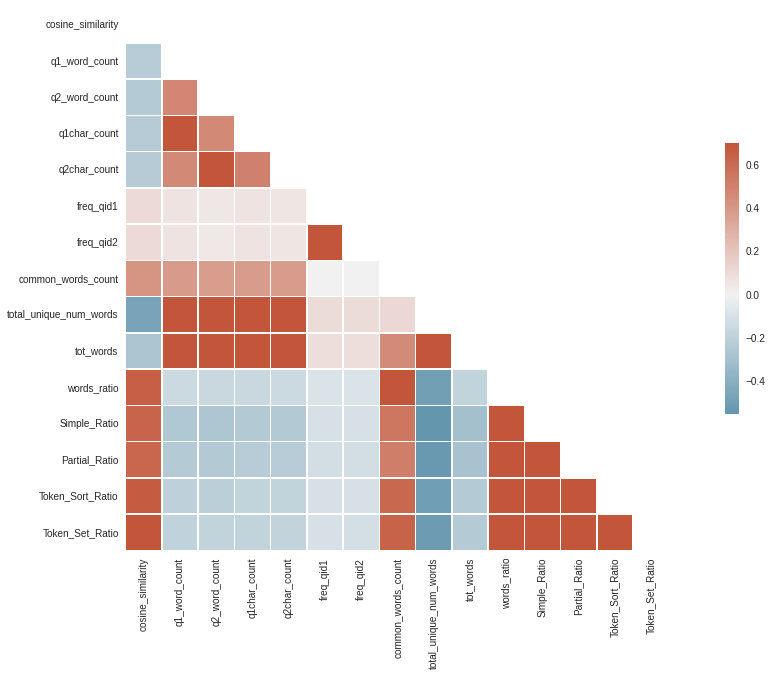

In [ ]:
plt.subplots(figsize=(20, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap,vmax =0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#We will set n_components to 9

N = 9
pca = PCA(n_components=N)
pca.fit(new_df)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#outputs an array of the variance explained by each component scaled to the total of 1.
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.37872661, 0.31214336, 0.16463823, 0.09773071, 0.01912955,
       0.01150644, 0.01045015, 0.00251918, 0.0021505 ])

In [ ]:
# Cumulative sum of principal components i.e. Cumulative variance of 2 = PC1 variance + PC2 variance
cumulative_variance = np.cumsum(np.round(explained_variance_ratio, decimals=3))
cumulative_variance

array([0.379, 0.691, 0.856, 0.954, 0.973, 0.985, 0.995, 0.998, 1.   ])

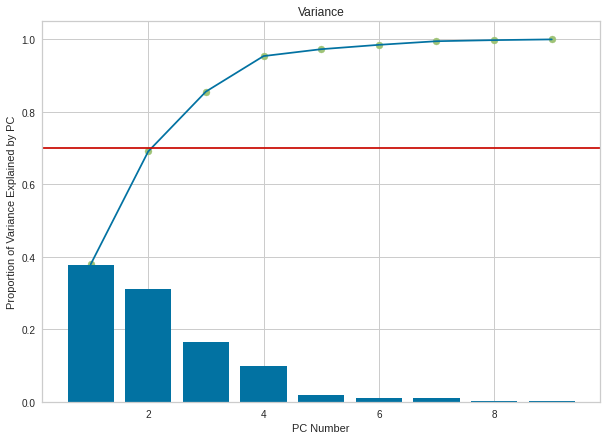

In [ ]:
x = list(range(1,N+1))
plt.figure(figsize=(10, 7)) 
plt.bar(x,explained_variance_ratio)
plt.scatter(range(1,N+1),cumulative_variance)
plt.plot(x,cumulative_variance)
plt.title('Variance')
plt.xlabel('PC Number')
plt.ylabel('Proportion of Variance Explained by PC')
plt.axhline(y=0.7, color = 'r')

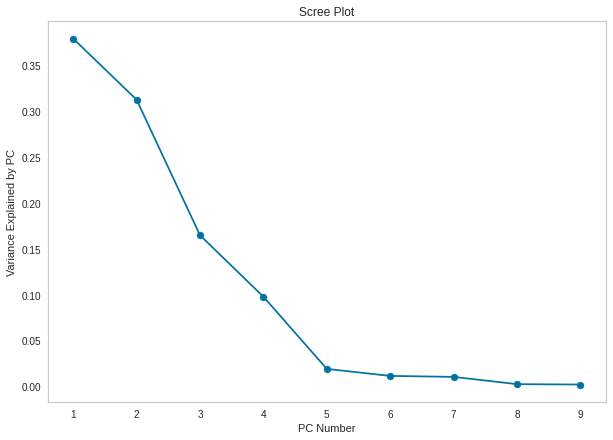

In [ ]:
#Scree Plot 
plt.figure(figsize=(10, 7)) 
plt.scatter(range(1,N+1),pca.explained_variance_ratio_)
plt.plot(range(1,N+1),pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('PC Number')
plt.ylabel('Variance Explained by PC')
plt.grid()

In [ ]:
#identify elbow(num)
kl = KneeLocator(range(1, N+1), pca.explained_variance_ratio_, curve="convex", direction="decreasing")

kl.elbow

5

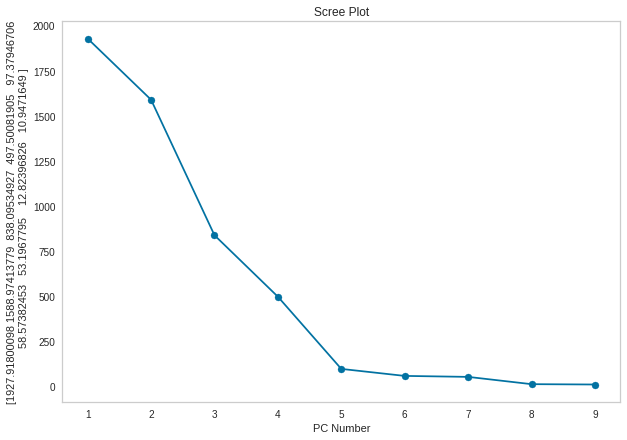

In [ ]:
#Plot the scree plot using pca.explained_variance_ instead. What does the explained variance show?
#Link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

plt.figure(figsize=(10, 7)) 
plt.scatter(range(1,N+1),pca.explained_variance_)
plt.plot(range(1,N+1),pca.explained_variance_)
plt.title('Scree Plot')
plt.xlabel('PC Number')
plt.ylabel(pca.explained_variance_)
plt.grid()

In [ ]:
def evaluate_pcs(num_of_pcs,data):
    def encode_vals(x): #helper functions to suppress loading less than 0.7 
    #a gradual process to lead to this function
        if x <= -0.5 or x >= 0.5: #Adjust the threshold value 
            return x
        else:
            return("")    
    f = FactorAnalyzer(n_factors=num_of_pcs, method = 'principal',rotation='varimax') #Conduct PCA + varimax rotation to extract latent factors 
    f.fit(data)
    loadings = pd.DataFrame(f.loadings_).set_index(data.columns)
    loadings = loadings.applymap(encode_vals)
    loadingcols= list(loadings.columns)
    newcols = {}
    for i in loadingcols:
        newcols[i] = "PC" + str(i+1)
    loadings.rename(columns = newcols,inplace=True)
    return loadings

In [ ]:
def CronbachAlpha(itemscores): #calculate the CronbachAlpha to see how closely related a set of items are as a group
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [ ]:
evaluate_pcs(5,scaled_features[colnames])

,PC1,PC2,PC3,PC4,PC5
cosine_similarity,0.620726,,,,0.741266
q1_word_count,,,,0.952667,
q2_word_count,,0.963702,,,
q1char_count,,,,0.943064,
q2char_count,,0.954367,,,
freq_qid1,,,0.96986,,
freq_qid2,,,0.970174,,
common_words_count,0.773078,,,,
total_unique_num_words,,0.65874,,0.593889,
tot_words,,0.725414,,0.667864,


In [ ]:
print(CronbachAlpha(scaled_features[['cosine_similarity','common_words_count','words_ratio','Simple_Ratio','Partial_Ratio','Token_Sort_Ratio','Token_Set_Ratio']])) #Reliability of PC1
print(CronbachAlpha(scaled_features[['q2_word_count','q2char_count','total_unique_num_words','tot_words']])) #Reliability of PC2
print(CronbachAlpha(scaled_features[['freq_qid1','freq_qid2']])) #Reliabililty of PC3
print(CronbachAlpha(scaled_features[['q1_word_count','q1char_count','total_unique_num_words','tot_words']]))#reliabilty of PC4
#print(CronbachAlpha(scaled_features[['cosine_similarity']])) #Reliabililty of PC3
#Reliability for all the features

# Now, on to test the reliability of the PCs using Cronbach's alpha, which is a
# measure of the internal consistency of the PCs. The higher their internal
# consistencies, the greater the chance the loadings generated using other
# samples of this data will be similar.

# All results are greater than our minimum requirement of 0.70. This means the
# PCs generated are reliable.

0.9494418981769245
0.9623171669682362
0.9441600969580575
0.9567175425345595


## Exploring our data further

In [ ]:
df_duplicate = train_clean[train_clean['is_duplicate'] == 1]
dfp_nonduplicate = train_clean[train_clean['is_duplicate'] == 0]

In [ ]:
import numpy as np
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()


In [ ]:
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

In [ ]:
textp_w=open("/content/train_n.txt").read()
textn_w=open("/content/train_p.txt").read()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")

Word Cloud for Duplicate Question pairs


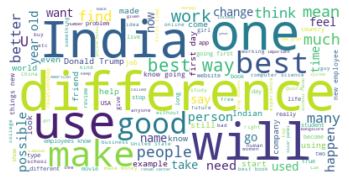

In [ ]:
wc=WordCloud(background_color="white", max_words=len(textp_w))
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non-Duplicate Question pairs


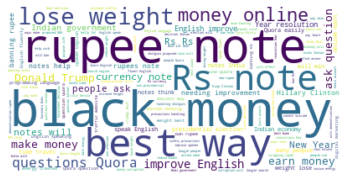

In [ ]:
wc=WordCloud(background_color="white", max_words=len(textn_w))
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()